In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate

# Display settings 
sns.set(style='whitegrid', palette='muted', color_codes=True)

# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#Install randomness
import random
random.seed(42)
np.random.seed(42)

# Library of Statistics and Warnings
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
df =  pd.read_csv('Large Cars Dataset.csv', encoding='ISO-8859-1', delimiter=',')

In [7]:
print('Dataset loaded the shape:', df.shape)
print('Columns in the dataset:', df.columns.tolist())

Dataset loaded the shape: (428, 15)
Columns in the dataset: ['Brand', 'Model', 'VehicleClass', 'Region', 'DriveTrain', 'MSRP', 'DealerCost', 'EngineSize', 'Cylinders', 'HorsePower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']


In [8]:
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [9]:
df.tail()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


<Axes: >

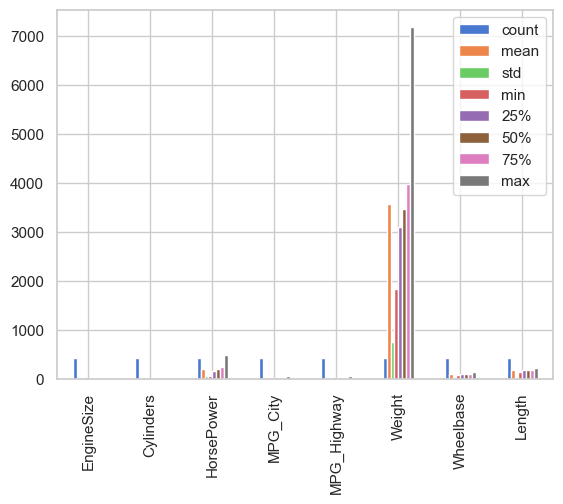

In [10]:
df.describe().T.plot(kind='bar')

In [11]:
df.columns.to_list()

['Brand',
 'Model',
 'VehicleClass',
 'Region',
 'DriveTrain',
 'MSRP',
 'DealerCost',
 'EngineSize',
 'Cylinders',
 'HorsePower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         428 non-null    object 
 1   Model         428 non-null    object 
 2   VehicleClass  428 non-null    object 
 3   Region        428 non-null    object 
 4   DriveTrain    428 non-null    object 
 5   MSRP          428 non-null    object 
 6   DealerCost    428 non-null    object 
 7   EngineSize    428 non-null    float64
 8   Cylinders     426 non-null    float64
 9   HorsePower    428 non-null    int64  
 10  MPG_City      428 non-null    int64  
 11  MPG_Highway   428 non-null    int64  
 12  Weight        428 non-null    int64  
 13  Wheelbase     428 non-null    int64  
 14  Length        428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [14]:
df.isnull().sum()

Brand           0
Model           0
VehicleClass    0
Region          0
DriveTrain      0
MSRP            0
DealerCost      0
EngineSize      0
Cylinders       2
HorsePower      0
MPG_City        0
MPG_Highway     0
Weight          0
Wheelbase       0
Length          0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

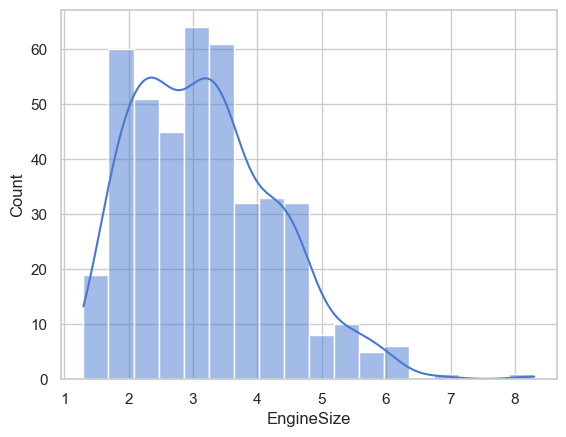

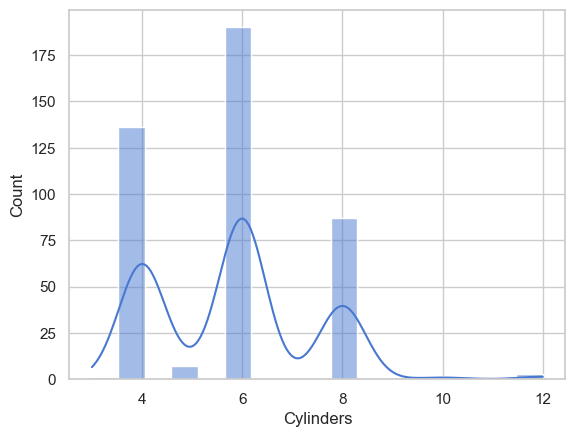

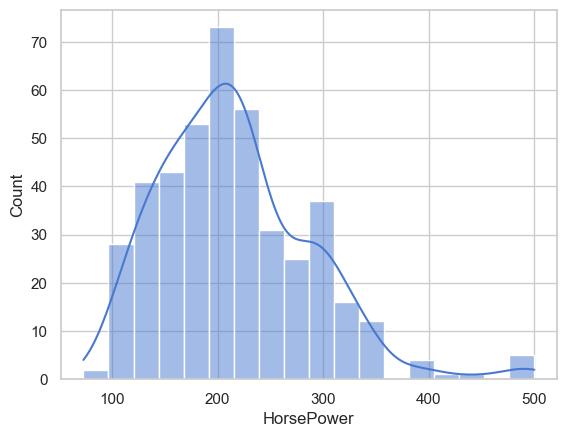

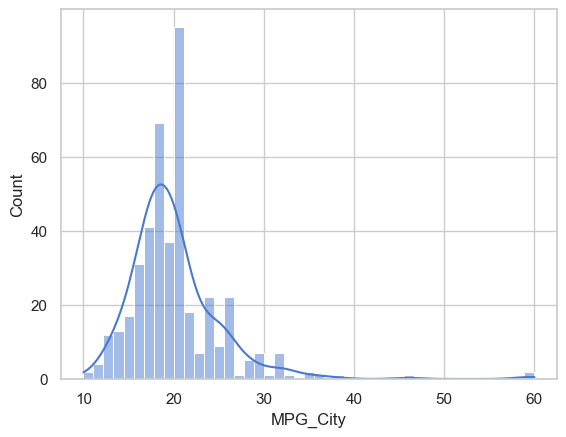

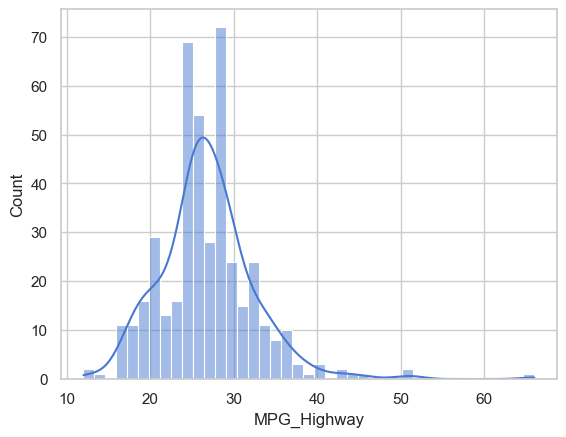

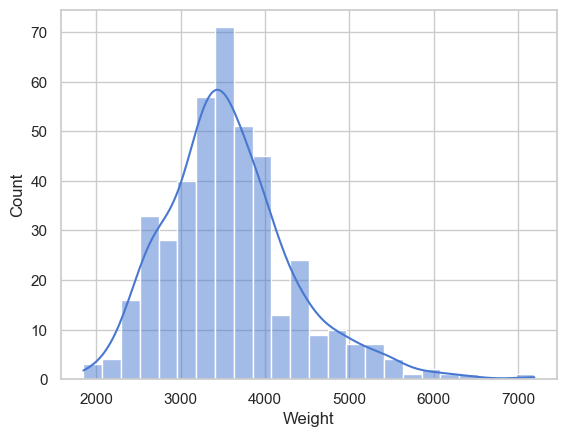

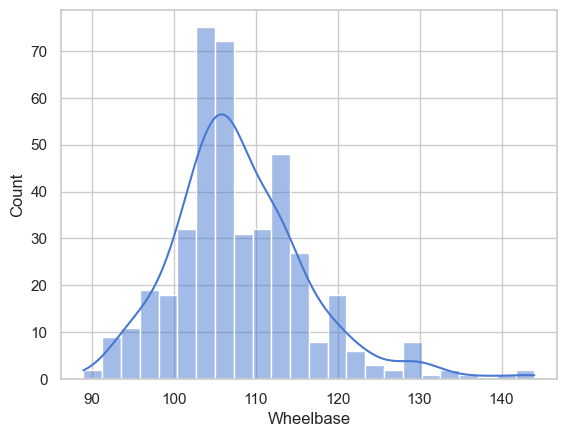

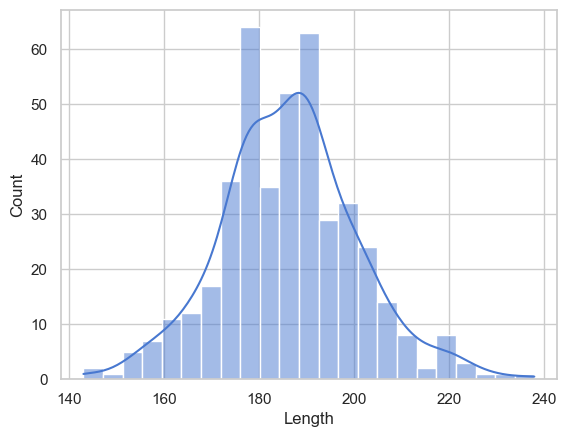

In [17]:
numeric_col = df.select_dtypes(include = ['number']).columns

#Distribution plot for each numeric column

for col in numeric_col:
    sns.histplot(x = col, data = df, kde = True)
    plt.show()

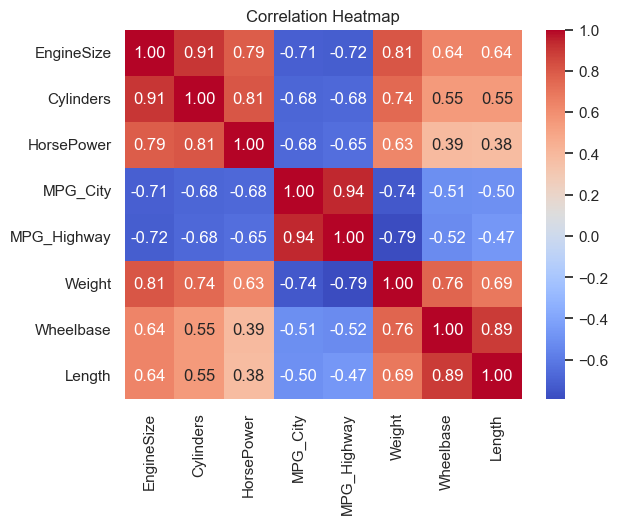

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include = [np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()


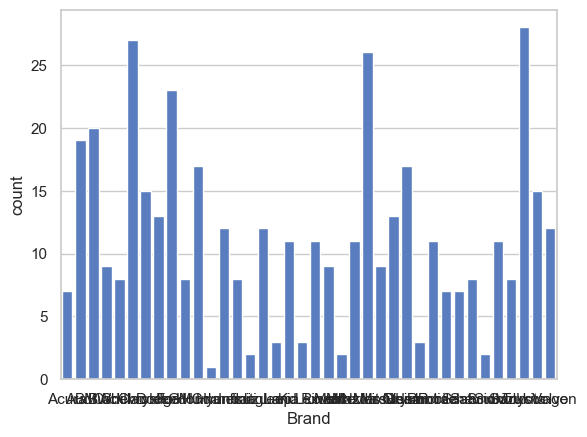

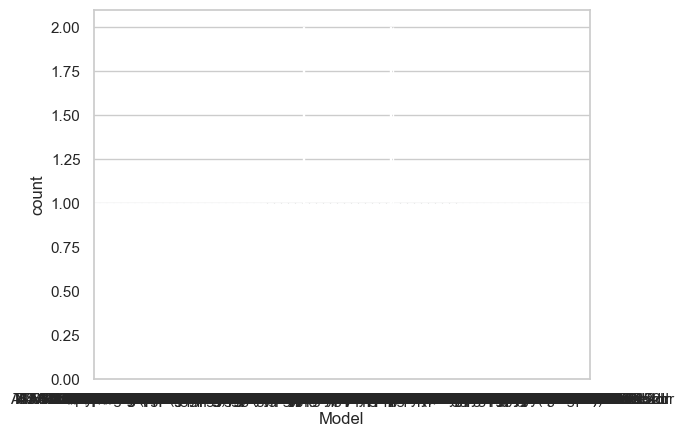

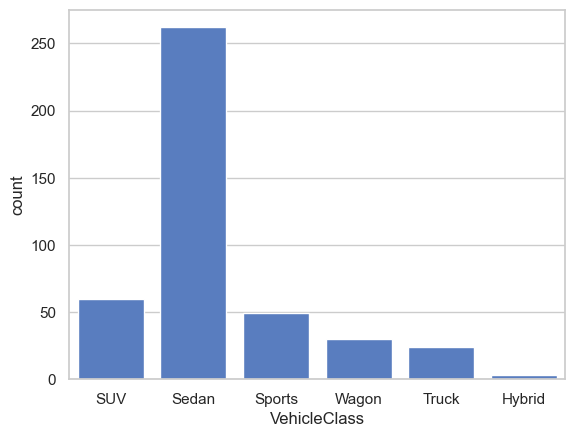

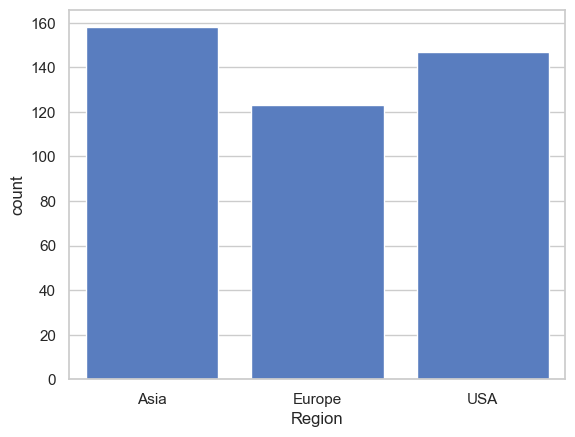

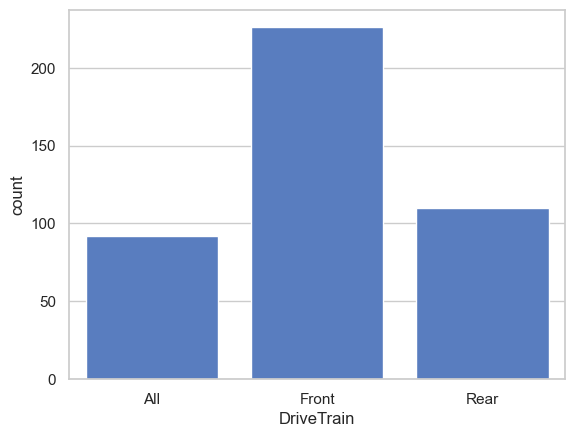

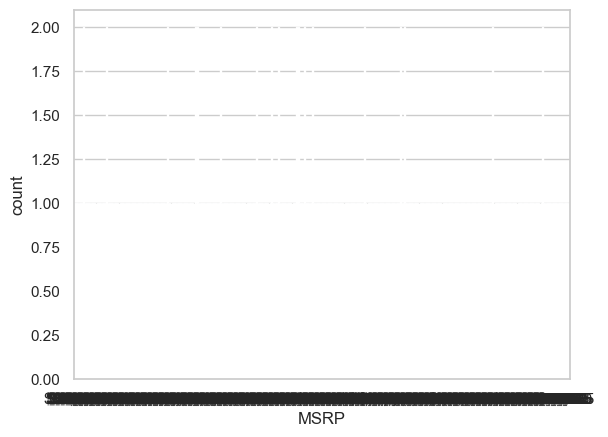

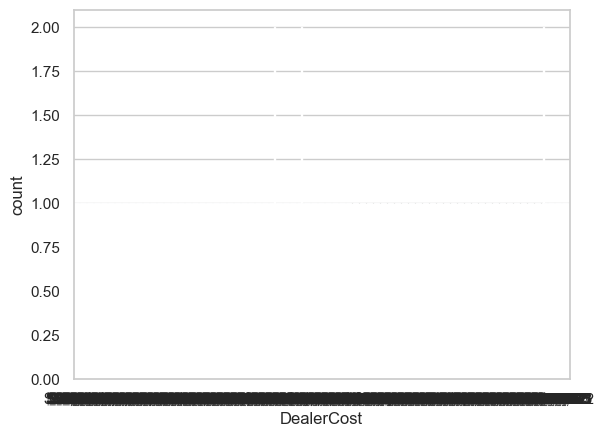

In [21]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x = col, data = df)
        plt.show()

In [22]:
df

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


In [28]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

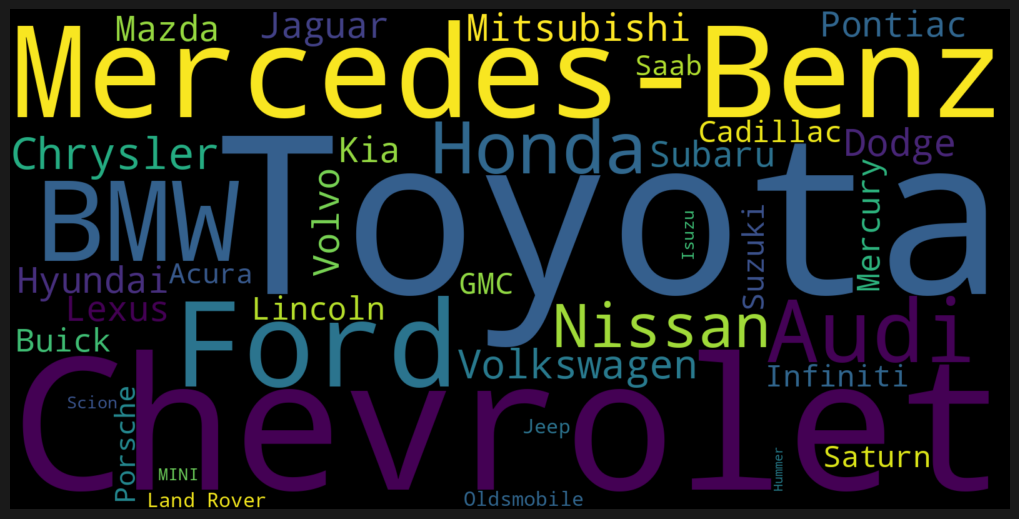

In [30]:
# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Brand"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()